# Vector Auto-Regression Model

VAR model only applies to stationary data. Therefore, we trains on 'change_in_price' data.

## Import libraries

In [1]:
import pandas as pd
import numpy as np

## Plotting
import matplotlib.pyplot as plt
import seaborn as sns

## sklearn and statsmodels
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import VAR

## Import TimeSeriesSplit
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

## Import yahoo finance
import yfinance as yf

## Import random
import random

## Read files

In [2]:
df = pd.read_csv('../Data/dataset_others.csv')
# Extract _change_in_price columns
change_in_price_cols = [col for col in df.columns if '_change_in_price' in col]
df_change = df[change_in_price_cols].copy()
df_change

,CADUSD=X_change_in_price,GM_change_in_price,JCI_change_in_price,TM_change_in_price,TRYUSD=X_change_in_price,^IXIC_change_in_price,F_change_in_price
0,-0.000418,0.099998,0.330002,-0.569992,-0.000812,15.439453,0.010000
1,0.001932,0.230000,0.160000,-0.309998,-0.000532,57.250000,0.090000
2,-0.000607,-0.139999,-0.279999,-1.449997,0.000039,-39.709961,-0.040000
3,-0.000238,-0.119999,-0.560001,0.059998,0.000314,-97.479492,-0.050000
4,-0.001081,-0.350002,-0.480000,0.459991,0.000223,-47.350586,-0.120000
...,...,...,...,...,...,...,...
1232,-0.001776,4.799999,-0.529999,0.759995,0.000026,39.759766,0.230000
1233,0.000905,-0.810001,-0.159996,1.400009,-0.000006,-303.119141,-0.049999
1234,-0.001072,-0.199997,0.379997,-0.900009,-0.000013,138.839844,0.179999
1235,-0.000866,-0.650002,-0.120003,1.570007,-0.000016,103.119141,-0.170000


## Create ticker list

In [3]:
tickers = []
for col in df.columns:
    if '_RSI' in col:
        tickers.append(col.split('_')[0])

tickers.pop()

'F'

## Train - test set

In [4]:
# Train set for cross-validation
train = df_change.iloc[501:].copy()
# Backtest set 
test = df_change.iloc[: 501].copy()

In [5]:
train

,CADUSD=X_change_in_price,GM_change_in_price,JCI_change_in_price,TM_change_in_price,TRYUSD=X_change_in_price,^IXIC_change_in_price,F_change_in_price
501,-0.003135,2.259998,-1.199997,-0.870010,-0.000558,-202.680664,1.090000
502,-0.002974,-1.009998,-0.450005,-0.029999,-0.002373,-79.620117,-0.279999
503,0.001578,-0.860001,-0.309998,-0.250000,-0.009663,70.090820,0.049999
504,0.000760,-2.020000,-1.470001,-4.979996,0.005433,-353.570312,-0.500000
505,-0.003792,-0.309998,0.940002,-2.360001,-0.002334,291.169922,-0.080000
...,...,...,...,...,...,...,...
1232,-0.001776,4.799999,-0.529999,0.759995,0.000026,39.759766,0.230000
1233,0.000905,-0.810001,-0.159996,1.400009,-0.000006,-303.119141,-0.049999
1234,-0.001072,-0.199997,0.379997,-0.900009,-0.000013,138.839844,0.179999
1235,-0.000866,-0.650002,-0.120003,1.570007,-0.000016,103.119141,-0.170000


## Standarize

In [6]:
scaler = StandardScaler()
train_s = pd.DataFrame(scaler.fit_transform(train), columns=train.columns)
test_s = pd.DataFrame(scaler.transform(test), columns=test.columns)

In [7]:
train_s

,CADUSD=X_change_in_price,GM_change_in_price,JCI_change_in_price,TM_change_in_price,TRYUSD=X_change_in_price,^IXIC_change_in_price,F_change_in_price
0,-0.982130,2.349868,-1.101894,-0.295604,-0.483440,-1.039045,2.908868
1,-0.930032,-1.031722,-0.410774,-0.005973,-2.333258,-0.418612,-0.711041
2,0.542963,-0.876605,-0.281757,-0.081828,-9.761662,0.336184,0.160904
3,0.278385,-2.076192,-1.350703,-1.712702,5.621297,-1.799784,-1.292343
4,-1.194552,-0.307833,0.870121,-0.809343,-2.293002,1.450796,-0.182589
...,...,...,...,...,...,...,...
731,-0.542239,4.976549,-0.484489,0.266412,0.111454,0.183264,0.636513
732,0.325333,-0.824900,-0.143530,0.487086,0.078633,-1.545425,-0.103319
733,-0.314559,-0.194078,0.354075,-0.305947,0.071781,0.682795,0.504399
734,-0.247802,-0.659440,-0.106676,0.545700,0.068322,0.502703,-0.420394


## Finding optimal lag order using cross-validation

Lag order refers to the number of past days that are included in the model. Optimal lag order is the order that yields the smallest AIC/ BIC from Vector Auto-Regression model. Forecast length refers to the number of future predictions we want to forecast.

In [8]:
def optimal_order(forecast_length = 5):
    
    MSE = {}
    acc = {}
    MSE_mean = {}
    acc_mean = {}
    MSE_order = {}
    acc_order = {}
    
    cv = TimeSeriesSplit(5, test_size=forecast_length)

    for i in range(len(change_in_price_cols) - 1):
        tr_set = train_s[[change_in_price_cols[-1], change_in_price_cols[i]]].copy()
        MSE[change_in_price_cols[i]] = [[0 for col in range(40)] for row in range(10)]
        acc[change_in_price_cols[i]] = [[0 for col in range(40)] for row in range(10)]
    
        k = 0
        for train_index, test_index in cv.split(tr_set):
            t_tt = tr_set.iloc[train_index]
            t_ho = tr_set.iloc[test_index]
    
            model = VAR(t_tt)
            for j in range(1, 41):
                var_model = model.fit(j)
                pred = var_model.forecast(t_tt[-j:].values, steps=forecast_length)
                MSE[change_in_price_cols[i]][k][j - 1] = np.sqrt(mean_squared_error(t_ho['F_change_in_price'].values, pred[:, 0]))
                acc[change_in_price_cols[i]][k][j - 1] = sum(pred[:, 0]*t_ho['F_change_in_price'] > 0)/len(t_ho)
            k += 1

        MSE_mean[change_in_price_cols[i]] = []
        acc_mean[change_in_price_cols[i]] = []
        MSE_mean[change_in_price_cols[i]].append(np.mean(MSE[change_in_price_cols[i]], axis=0))
        acc_mean[change_in_price_cols[i]].append(np.mean(acc[change_in_price_cols[i]], axis=0))
        MSE_order[change_in_price_cols[i]] = (np.argmin(np.mean(MSE[change_in_price_cols[i]], axis=0)) + 1)
        acc_order[change_in_price_cols[i]] = (np.argmax(np.mean(acc[change_in_price_cols[i]], axis=0)) + 1)

    return MSE, acc, MSE_mean, MSE_order, acc_mean, acc_order

### Find optimal lag order for each ticker and each forecast length.

In [9]:
MSE_1, acc_1, MSE_mean_1, MSE_order_1, acc_mean_1, acc_order_1 = optimal_order(1)
MSE_2, acc_2, MSE_mean_2, MSE_order_2, acc_mean_2, acc_order_2 = optimal_order(2)
MSE_3, acc_3, MSE_mean_3, MSE_order_3, acc_mean_3, acc_order_3 = optimal_order(3)
MSE_4, acc_4, MSE_mean_4, MSE_order_4, acc_mean_4, acc_order_4 = optimal_order(4)
MSE_5, acc_5, MSE_mean_5, MSE_order_5, acc_mean_5, acc_order_5 = optimal_order(5)

### Create a null optimal_order table

In [10]:
c = ['Ticker']
for i in range(1, 6):
    s = 'n = ' + str(i)
    c.append(s)
print(c)

optimal_order = pd.DataFrame(columns=c)
for i, t in enumerate(tickers):
    optimal_order.loc[i, 'Ticker'] = t.split('_')[0]
optimal_order

['Ticker', 'n = 1', 'n = 2', 'n = 3', 'n = 4', 'n = 5']


,Ticker,n = 1,n = 2,n = 3,n = 4,n = 5
0,CADUSD=X,NaN,NaN,NaN,NaN,NaN
1,GM,NaN,NaN,NaN,NaN,NaN
2,JCI,NaN,NaN,NaN,NaN,NaN
3,TM,NaN,NaN,NaN,NaN,NaN
4,TRYUSD=X,NaN,NaN,NaN,NaN,NaN
5,^IXIC,NaN,NaN,NaN,NaN,NaN


### Fill in the table

We choose the larger order lag between order that minimizes MSE and order that maximizes class accuracy.

In [11]:
for i in range(len(change_in_price_cols) - 1):
    optimal_order.loc[i, 'n = 1'] = (max(MSE_order_1[change_in_price_cols[i]], acc_order_1[change_in_price_cols[i]]))
    optimal_order.loc[i, 'n = 2'] = (max(MSE_order_2[change_in_price_cols[i]], acc_order_2[change_in_price_cols[i]]))
    optimal_order.loc[i, 'n = 3'] = (max(MSE_order_3[change_in_price_cols[i]], acc_order_3[change_in_price_cols[i]]))
    optimal_order.loc[i, 'n = 4'] = (max(MSE_order_4[change_in_price_cols[i]], acc_order_4[change_in_price_cols[i]]))
    optimal_order.loc[i, 'n = 5'] = (max(MSE_order_5[change_in_price_cols[i]], acc_order_5[change_in_price_cols[i]]))

optimal_order

,Ticker,n = 1,n = 2,n = 3,n = 4,n = 5
0,CADUSD=X,21,7,6,8,7
1,GM,14,12,29,29,16
2,JCI,33,30,33,22,22
3,TM,27,30,26,27,27
4,TRYUSD=X,22,22,18,39,39
5,^IXIC,27,26,26,26,26


## Retrain models on training set

In [12]:
def retrain(forecast_length = 5):
    
    res = {}
    
    cv = TimeSeriesSplit(5, test_size=forecast_length)
    
    for i in range(len(change_in_price_cols) - 1):
        tr_set = train_s[[change_in_price_cols[-1], change_in_price_cols[i]]].copy()
        k = optimal_order.loc[i, optimal_order.columns[forecast_length]]
        model = VAR(tr_set)
        result = model.fit(k)
        res[change_in_price_cols[i]] = result

    return res

In [13]:
res_1 = retrain(forecast_length = 1)
res_2 = retrain(forecast_length = 2)
res_3 = retrain(forecast_length = 3)
res_4 = retrain(forecast_length = 4)
res_5 = retrain(forecast_length = 5)

In [14]:
res = {}
for i in range(len(change_in_price_cols) - 1):
    res[change_in_price_cols[i]] = [res_1[change_in_price_cols[i]],
                                   res_2[change_in_price_cols[i]],
                                   res_3[change_in_price_cols[i]],
                                   res_4[change_in_price_cols[i]],
                                   res_5[change_in_price_cols[i]]]

## Apply optimal order on Backtesting set

Choose 10 subsets in the test set to validate our model.

In [15]:
def backtest(forecast_length=5):
    size = len(test) // 10
    rng = np.random.RandomState(42)
    acc_backtest = {}
    MSE = {}
    
    for i in range(len(change_in_price_cols) - 1):
        opt_order = optimal_order.loc[i, optimal_order.columns[forecast_length]]
        acc_backtest[change_in_price_cols[i]] = []
        for j in range(10):
            if size > 2*(opt_order + forecast_length):
                m = rng.randint(j*size + (opt_order + forecast_length), (j + 1)*size - (opt_order + forecast_length))
            else: # to avoid low > high
                m = rng.randint(j*size, (j+1)*size - (opt_order + forecast_length))
            backtest = test_s.iloc[m: m + opt_order][['F_change_in_price', change_in_price_cols[i]]].copy()
            test_set = test_s.iloc[m + opt_order: m + opt_order + forecast_length][['F_change_in_price', change_in_price_cols[i]]].copy()
            
            # Model
            result = res[change_in_price_cols[i]][forecast_length-1]
            #pred = result.forecast(scaled_train.values, steps=forecast_length)
            pred = result.forecast(backtest.values, steps=forecast_length)
            MSE[change_in_price_cols[i]] = (mean_squared_error(test_set['F_change_in_price'].values, pred[:, 0]))
            acc_backtest[change_in_price_cols[i]].append(sum(pred[:, 0]*test_set['F_change_in_price'] > 0)/len(test_set))
    return acc_backtest, MSE

In [16]:
acc_backtest_1, MSE_backtest_1 = backtest(1)
acc_backtest_2, MSE_backtest_2 = backtest(2)
acc_backtest_3, MSE_backtest_3 = backtest(3)
acc_backtest_4, MSE_backtest_4 = backtest(4)
acc_backtest_5, MSE_backtest_5 = backtest(5)

In [17]:
acc_backtest_mean = optimal_order.copy()
acc_backtest_std = optimal_order.copy()

MSE_backtest_mean = optimal_order.copy()
MSE_backtest_std = optimal_order.copy()

In [18]:
for i in range(len(change_in_price_cols) - 1):
    acc_backtest_mean.loc[i, 'n = 1'] = np.mean(acc_backtest_1[change_in_price_cols[i]])
    acc_backtest_mean.loc[i, 'n = 2'] = np.mean(acc_backtest_2[change_in_price_cols[i]])
    acc_backtest_mean.loc[i, 'n = 3'] = np.mean(acc_backtest_3[change_in_price_cols[i]])
    acc_backtest_mean.loc[i, 'n = 4'] = np.mean(acc_backtest_4[change_in_price_cols[i]])
    acc_backtest_mean.loc[i, 'n = 5'] = np.mean(acc_backtest_5[change_in_price_cols[i]])

    acc_backtest_std.loc[i, 'n = 1'] = np.std(acc_backtest_1[change_in_price_cols[i]])/np.sqrt(10)
    acc_backtest_std.loc[i, 'n = 2'] = np.std(acc_backtest_2[change_in_price_cols[i]])/np.sqrt(10)
    acc_backtest_std.loc[i, 'n = 3'] = np.std(acc_backtest_3[change_in_price_cols[i]])/np.sqrt(10)
    acc_backtest_std.loc[i, 'n = 4'] = np.std(acc_backtest_4[change_in_price_cols[i]])/np.sqrt(10)
    acc_backtest_std.loc[i, 'n = 5'] = np.std(acc_backtest_5[change_in_price_cols[i]])/np.sqrt(10)

    MSE_backtest_mean.loc[i, 'n = 1'] = np.mean(MSE_backtest_1[change_in_price_cols[i]])
    MSE_backtest_mean.loc[i, 'n = 2'] = np.mean(MSE_backtest_2[change_in_price_cols[i]])
    MSE_backtest_mean.loc[i, 'n = 3'] = np.mean(MSE_backtest_3[change_in_price_cols[i]])
    MSE_backtest_mean.loc[i, 'n = 4'] = np.mean(MSE_backtest_4[change_in_price_cols[i]])
    MSE_backtest_mean.loc[i, 'n = 5'] = np.mean(MSE_backtest_5[change_in_price_cols[i]])

    MSE_backtest_std.loc[i, 'n = 1'] = np.std(MSE_backtest_1[change_in_price_cols[i]])/np.sqrt(10)
    MSE_backtest_std.loc[i, 'n = 2'] = np.std(MSE_backtest_2[change_in_price_cols[i]])/np.sqrt(10)
    MSE_backtest_std.loc[i, 'n = 3'] = np.std(MSE_backtest_3[change_in_price_cols[i]])/np.sqrt(10)
    MSE_backtest_std.loc[i, 'n = 4'] = np.std(MSE_backtest_4[change_in_price_cols[i]])/np.sqrt(10)
    MSE_backtest_std.loc[i, 'n = 5'] = np.std(MSE_backtest_5[change_in_price_cols[i]])/np.sqrt(10)

In [19]:
acc_backtest_mean

,Ticker,n = 1,n = 2,n = 3,n = 4,n = 5
0,CADUSD=X,0.5,0.55,0.466667,0.45,0.38
1,GM,0.3,0.45,0.733333,0.65,0.56
2,JCI,0.6,0.45,0.533333,0.55,0.48
3,TM,0.7,0.7,0.466667,0.65,0.5
4,TRYUSD=X,0.5,0.7,0.5,0.65,0.5
5,^IXIC,0.4,0.65,0.6,0.525,0.62


For n = 1, TM yields the best performance

In [20]:
acc_backtest_1['TM_change_in_price']

[0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0]

For n = 2, both TM and TRYUSD=X yield the best performance

In [21]:
acc_backtest_2['TM_change_in_price']

[1.0, 0.5, 1.0, 0.5, 1.0, 0.5, 1.0, 0.5, 1.0, 0.0]

For n = 3, GM yields the best performance

In [22]:
acc_backtest_3['GM_change_in_price']

[0.3333333333333333,
 0.6666666666666666,
 1.0,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 1.0,
 0.6666666666666666,
 1.0]

For n = 4, GM, TM, and TRYUSD yield the best performance

In [23]:
acc_backtest_4['GM_change_in_price']

[0.25, 0.5, 1.0, 0.5, 0.5, 0.5, 0.75, 0.75, 0.75, 1.0]

For n = 5, IXIC yields the best performance

In [24]:
acc_backtest_5['^IXIC_change_in_price']

[0.6, 0.6, 0.8, 0.4, 0.6, 0.6, 0.8, 0.6, 0.4, 0.8]

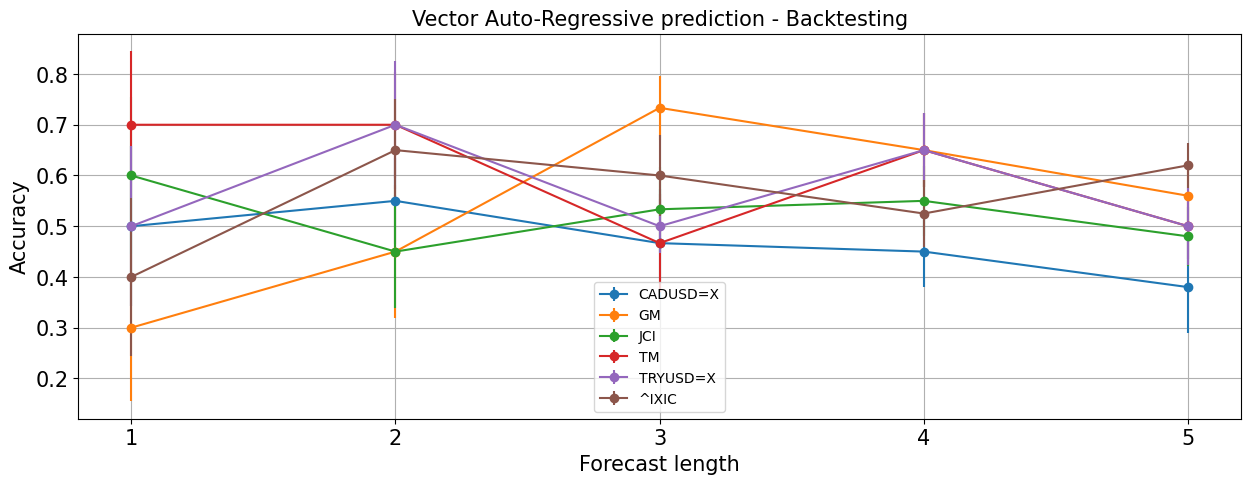

In [25]:
x = [i + 1 for i in range(5)]
mean_df = acc_backtest_mean.drop('Ticker', axis=1).copy()
std_df = acc_backtest_std.drop('Ticker', axis=1).copy()

plt.figure(figsize=(15,5))
for i in range(len(change_in_price_cols) - 1):
    t = acc_backtest_mean.loc[i, 'Ticker']
    m = mean_df.iloc[i].to_numpy()
    s = std_df.iloc[i].to_numpy()
    plt.errorbar(x, m, s, marker='o', label=t)
plt.legend()
plt.xticks(x, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Forecast length', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.title('Vector Auto-Regressive prediction - Backtesting', fontsize=15)
plt.grid(True)
#plt.show()
plt.savefig('VAR_backtest.jpg')

## Validation set - data between November 4, 2024 and November 29, 2024

Validation set is Ford's trading data between November 4, 2024 and November 29, 2024.

### Import from yfinance

In [26]:
start = '2024-8-8'
end = '2024-11-30'

Ford = yf.download('F', start=start, end=end)
CADUSD = yf.download('CADUSD=X', start=start, end=end)
GM = yf.download('GM', start=start, end=end)
JCI = yf.download('JCI', start=start, end=end)
TM = yf.download('TM', start=start, end=end)
TRYUSD = yf.download('TRYUSD=X', start=start, end=end)
IXIC = yf.download('^IXIC', start=start, end=end)

Ford['F_change_in_price'] = Ford.Close.diff().dropna()
CADUSD['CADUSD=X_change_in_price'] = CADUSD.Close.diff().dropna()
GM['GM_change_in_price'] = GM.Close.diff().dropna()
JCI['JCI_change_in_price'] = JCI.Close.diff().dropna()
TM['TM_change_in_price'] = TM.Close.diff().dropna()
TRYUSD['TRYUSD=X_change_in_price'] = TRYUSD.Close.diff().dropna()
IXIC['^IXIC_change_in_price'] = IXIC.Close.diff().dropna()

Ford = Ford.reset_index()
CADUSD = CADUSD.reset_index()
GM = GM.reset_index()
JCI = JCI.reset_index()
TM = TM.reset_index()
TRYUSD = TRYUSD.reset_index()
IXIC = IXIC.reset_index()

df_forward = pd.DataFrame(Ford.Date.copy())
df_forward = pd.concat([df_forward, 
                           CADUSD['CADUSD=X_change_in_price'].copy(),
                           GM['GM_change_in_price'].copy(),
                           JCI['JCI_change_in_price'].copy(),
                           TM['TM_change_in_price'].copy(),
                           TRYUSD['TRYUSD=X_change_in_price'].copy(),
                           IXIC['^IXIC_change_in_price'].copy(),
                           Ford.F_change_in_price.copy()], axis=1, join='inner') # Remove US holidays

df_forward

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Date,CADUSD=X_change_in_price,GM_change_in_price,JCI_change_in_price,TM_change_in_price,TRYUSD=X_change_in_price,^IXIC_change_in_price,F_change_in_price
0,2024-08-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-08-09,0.001022,0.750000,-0.119995,-0.779999,-0.000018,85.281250,-0.030000
2,2024-08-12,-0.000026,-0.489998,-1.090004,-0.619995,0.000008,35.308594,-0.240001
3,2024-08-13,-0.000339,0.329998,1.260002,4.419998,0.000062,407.000000,0.280001
4,2024-08-14,0.001762,0.290001,0.680000,4.619995,-0.000050,4.990234,0.040000
...,...,...,...,...,...,...,...,...
75,2024-11-22,-0.000667,2.849998,-0.540001,1.019989,0.000025,31.230469,0.380000
76,2024-11-25,-0.000614,1.670002,-0.110001,1.430008,-0.000049,51.189453,0.219999
77,2024-11-26,0.002423,-5.410000,0.410004,-3.309998,0.000090,119.460938,-0.299999
78,2024-11-27,-0.008430,0.709999,-0.040001,-2.800003,-0.000149,-113.820312,0.000000


In [27]:
#df_forward_temp = df_forward.drop(columns='Date').copy()
df_forward_s = pd.DataFrame(scaler.transform(df_forward.drop(columns='Date').copy()), index=df_forward.index, columns=df_forward.columns[1:])

In [28]:
df_forward_s

,CADUSD=X_change_in_price,GM_change_in_price,JCI_change_in_price,TM_change_in_price,TRYUSD=X_change_in_price,^IXIC_change_in_price,F_change_in_price
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.363022,0.788339,-0.106669,-0.264568,0.066635,0.412769,-0.050475
2,0.023875,-0.493976,-1.000535,-0.209400,0.093717,0.160823,-0.605355
3,-0.077293,0.354004,1.165001,1.528360,0.148018,2.034776,0.768630
4,0.602719,0.312641,0.630528,1.597317,0.034448,0.007967,0.134483
...,...,...,...,...,...,...,...
75,-0.183417,2.960002,-0.493706,0.356057,0.110812,0.140262,1.032855
76,-0.166405,1.739737,-0.097459,0.497429,0.035528,0.240889,0.610090
77,0.816608,-5.581879,0.381726,-1.136896,0.176864,0.585093,-0.763887
78,-2.695709,0.746973,-0.032955,-0.961053,-0.066824,-0.591039,0.028792


### Definition to test validation

In [29]:
def forward_validation(s='2024-11-04', e='2024-11-08', forecast_length=5):
    acc_forward = {}
    pred_forward = {}
    
    for i in range(len(change_in_price_cols) - 1):
        opt_order = optimal_order.loc[i, optimal_order.columns[forecast_length]]
        acc_forward[change_in_price_cols[i]] = []
        pred_forward[change_in_price_cols[i]] = []
        m = np.where(df_forward.Date == s)[0][0]
        n = np.where(df_forward.Date == e)[0][0]
        train_forward = df_forward_s.iloc[m - opt_order: m][[change_in_price_cols[i], 'F_change_in_price']]
        test_forward = df_forward_s.iloc[m: n + 1][[change_in_price_cols[i], 'F_change_in_price']]

        # Model
        result = res[change_in_price_cols[i]][forecast_length-1]

        first_test_index = test_forward.index[0]
        input_scaled = train_forward
        pred_evaluate = []
        j = 0

        while len(pred_evaluate) < n - m + 1:
            pred_evaluate = np.concatenate((pred_evaluate, result.forecast(input_scaled.values, steps=forecast_length)[:, 1]))
            input_scaled = pd.concat([train_forward, test_forward.loc[first_test_index: first_test_index + (j + 1)*forecast_length - 1]])
            j += 1
            
        # If len(pred_evaluate) > 5, delete the last values until len(pred_evaluate) == 5
        while len(pred_evaluate) > n - m + 1:
            pred_evaluate = np.delete(pred_evaluate, -1)

        pred_forward[change_in_price_cols[i]] = pred_evaluate
        acc_forward[change_in_price_cols[i]] = sum(pred_evaluate*test_forward['F_change_in_price'] > 0)/len(test_forward)

    return acc_forward, pd.concat([df_forward.iloc[m: n + 1]['Date'],pd.DataFrame(pred_forward, index=test_forward.index), test_forward['F_change_in_price']], axis=1)

In [30]:
## Combine 4 weeks:
s = '2024-11-04'
e = '2024-11-29'
acc_forward_1, df_forward_1 = forward_validation(s, e, forecast_length=1)
acc_forward_2, df_forward_2 = forward_validation(s, e, forecast_length=2)
acc_forward_3, df_forward_3 = forward_validation(s, e, forecast_length=3)
acc_forward_4, df_forward_4 = forward_validation(s, e, forecast_length=4)
acc_forward_5, df_forward_5 = forward_validation(s, e, forecast_length=5)

In [31]:
acc_forward_mean = acc_backtest_mean.copy()

In [32]:
for i in range(len(change_in_price_cols) - 1):
    acc_forward_mean.loc[i, 'n = 1'] = np.mean(acc_forward_1[change_in_price_cols[i]])
    acc_forward_mean.loc[i, 'n = 2'] = np.mean(acc_forward_2[change_in_price_cols[i]])
    acc_forward_mean.loc[i, 'n = 3'] = np.mean(acc_forward_3[change_in_price_cols[i]])
    acc_forward_mean.loc[i, 'n = 4'] = np.mean(acc_forward_4[change_in_price_cols[i]])
    acc_forward_mean.loc[i, 'n = 5'] = np.mean(acc_forward_5[change_in_price_cols[i]])

In [33]:
acc_forward_mean

,Ticker,n = 1,n = 2,n = 3,n = 4,n = 5
0,CADUSD=X,0.526316,0.578947,0.368421,0.578947,0.473684
1,GM,0.315789,0.368421,0.368421,0.421053,0.473684
2,JCI,0.578947,0.526316,0.631579,0.578947,0.578947
3,TM,0.578947,0.526316,0.578947,0.631579,0.631579
4,TRYUSD=X,0.736842,0.736842,0.684211,0.684211,0.684211
5,^IXIC,0.473684,0.473684,0.473684,0.473684,0.473684


### Forecast the last 7 days

We want to forecast Ford's close price from November 20 to November 29.

In [34]:
s_test = '2024-11-20'
e_test = '2024-11-29'

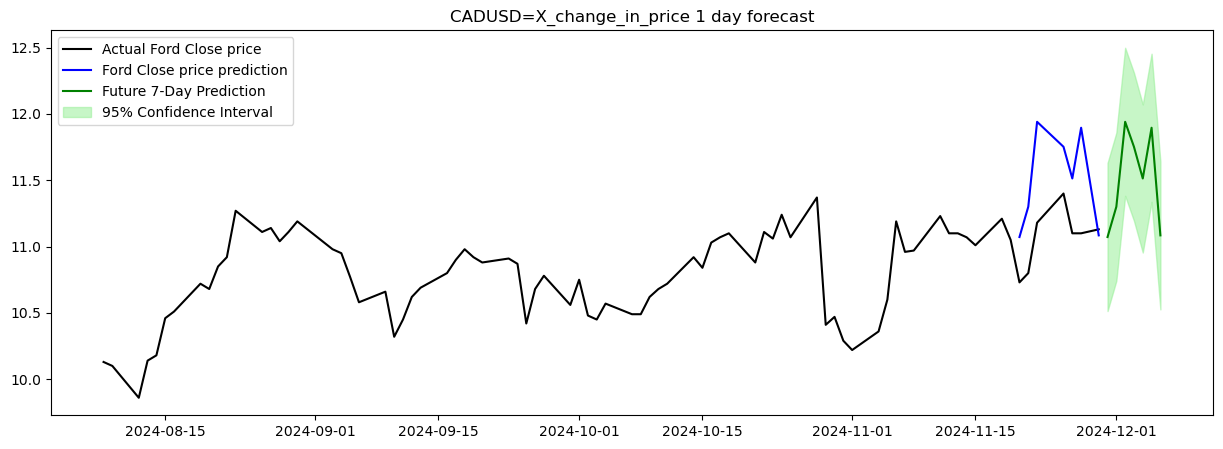

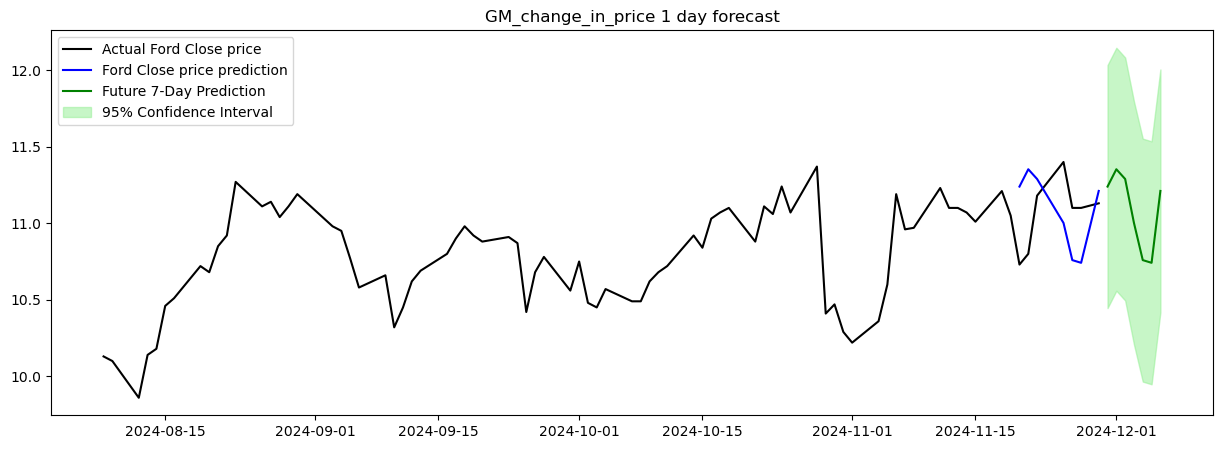

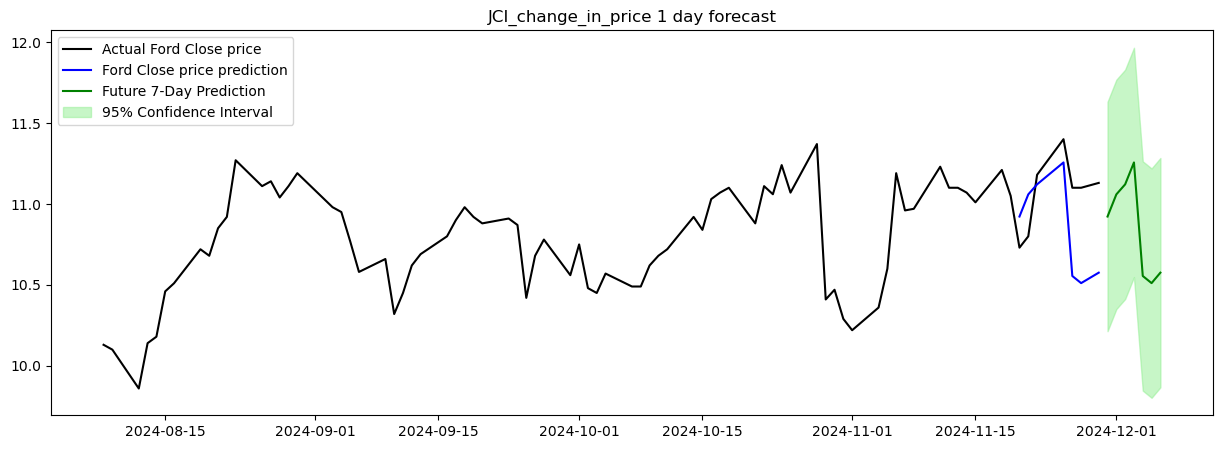

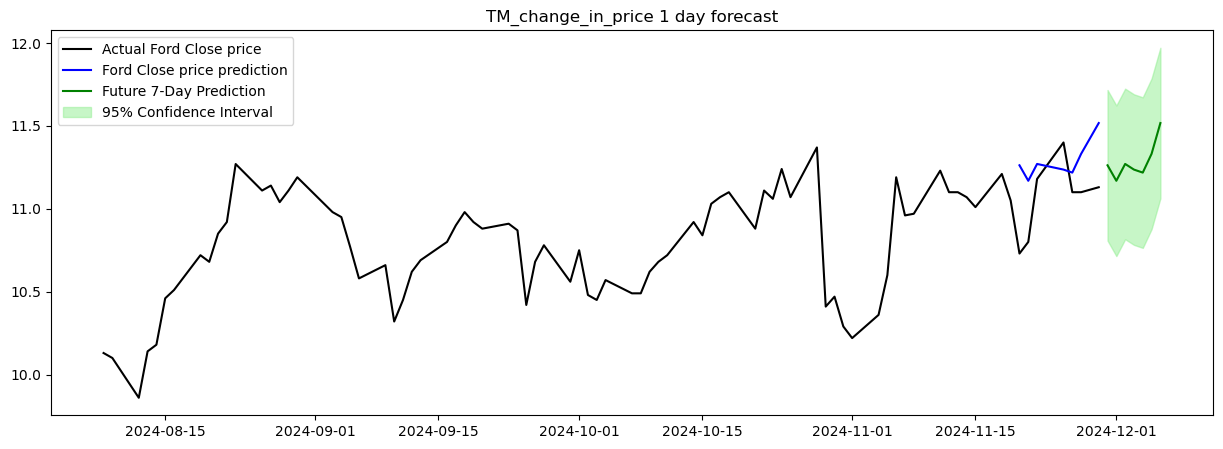

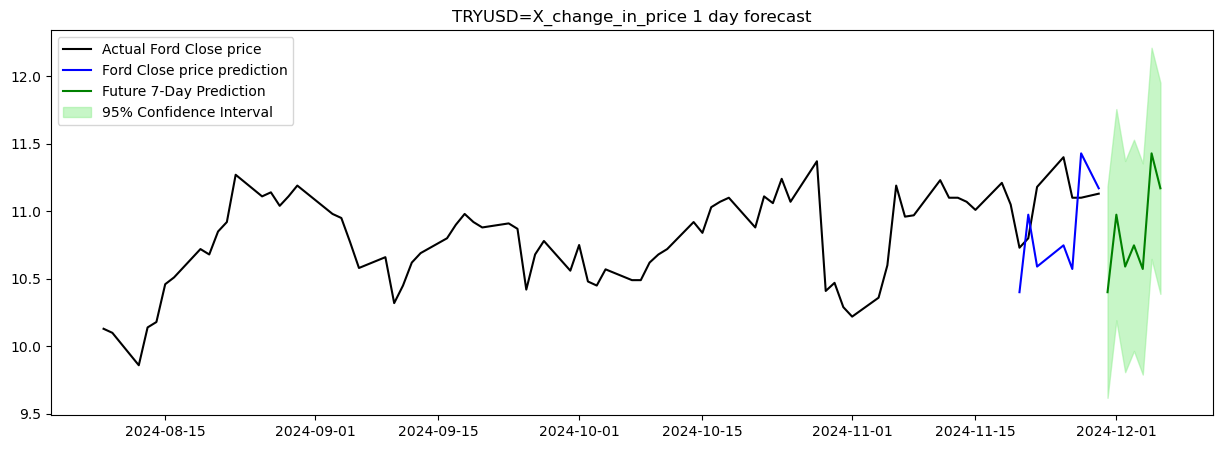

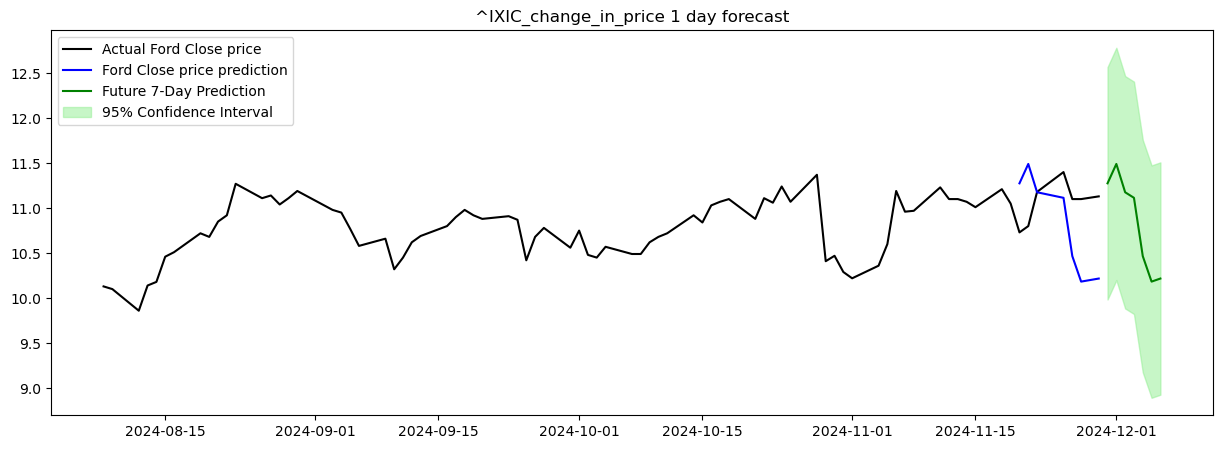

In [35]:
acc_forward_test_1, df_forward_test_1 = forward_validation(s_test, e_test, forecast_length=1)
last_index = df_forward_test_1.index[0] - 1

for i in range(len(change_in_price_cols) - 1):
    pred = pd.DataFrame(Ford.loc[last_index]['Close'] + df_forward_test_1[change_in_price_cols[i]].cumsum(), index=df_forward_test_1.index)
    # Calculate confidence interval
    std_dev = (pred[change_in_price_cols[i]] - Ford.loc[last_index+1:]['Close']).std()
    upper_bound = pred[change_in_price_cols[i]] + (1.96*std_dev)
    lower_bound = pred[change_in_price_cols[i]] - (1.96*std_dev)
    # Plot
    plt.figure(figsize=(15,5))
    plt.plot(Ford['Date'], Ford['Close'], label='Actual Ford Close price', color='k')
    plt.plot(Ford.loc[last_index + 1:]['Date'], pred[change_in_price_cols[i]], label='Ford Close price prediction', color='b')
    future_dates = pd.date_range(Ford['Date'].iloc[-1] + pd.Timedelta(days=1), periods=7)
    plt.plot(future_dates, pred, label="Future 7-Day Prediction", color='green')
    plt.fill_between(future_dates, lower_bound, upper_bound, color='lightgreen', alpha=0.5, label="95% Confidence Interval")
    plt.title(change_in_price_cols[i] + ' 1 day forecast')
    plt.legend()
    plt.show()

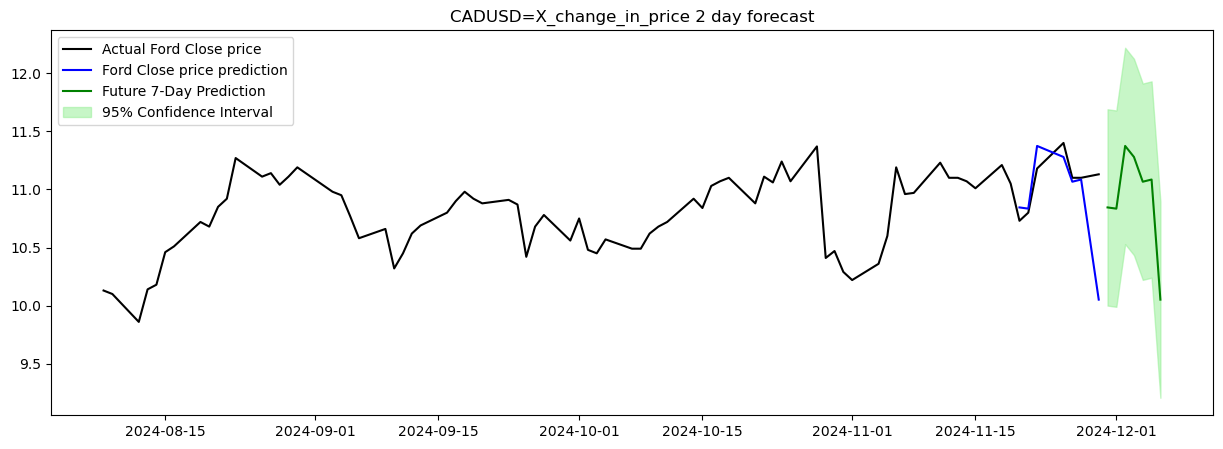

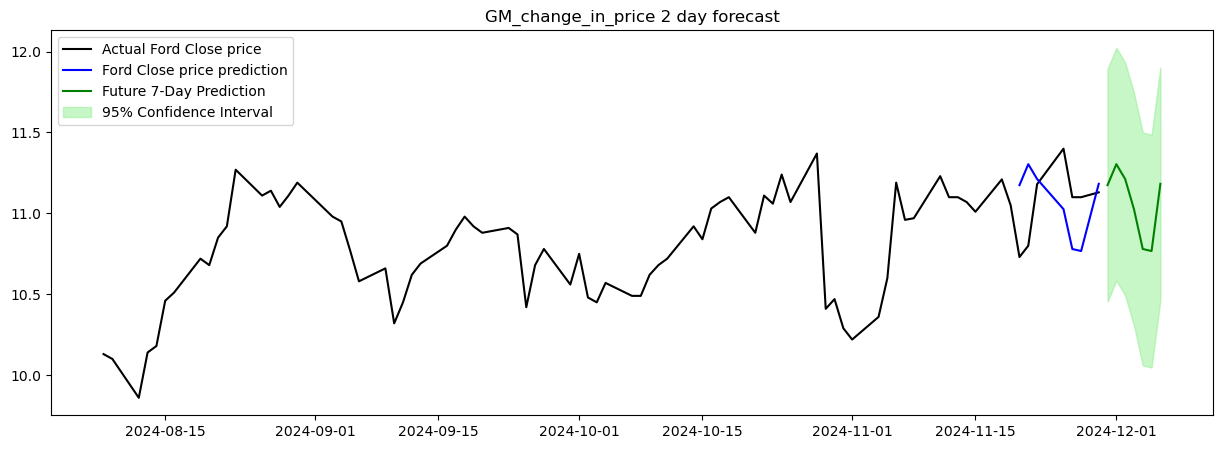

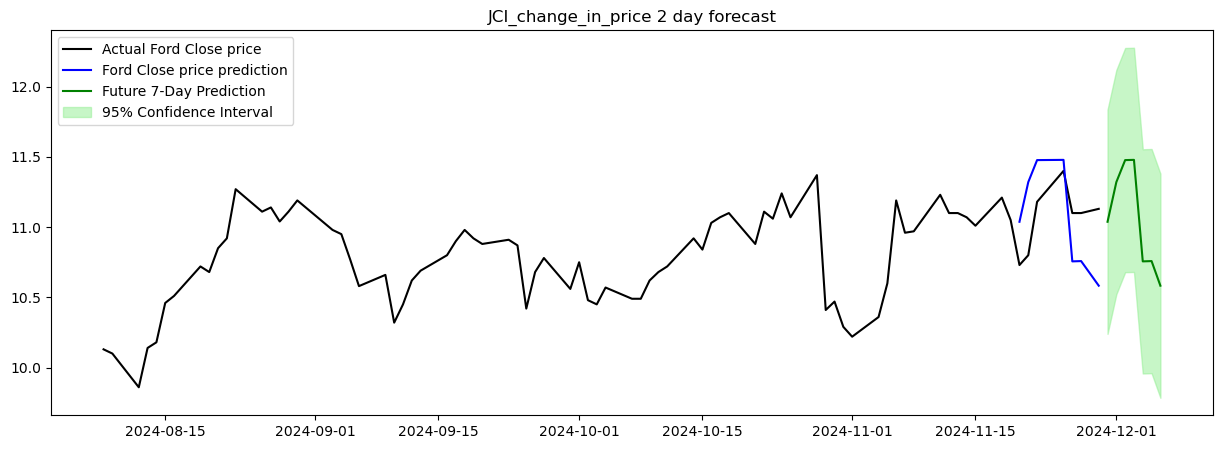

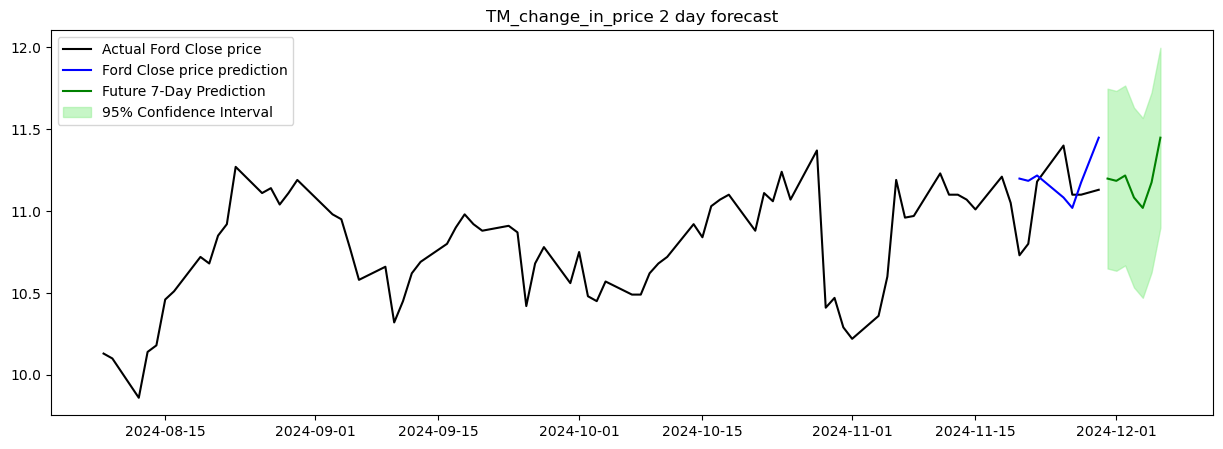

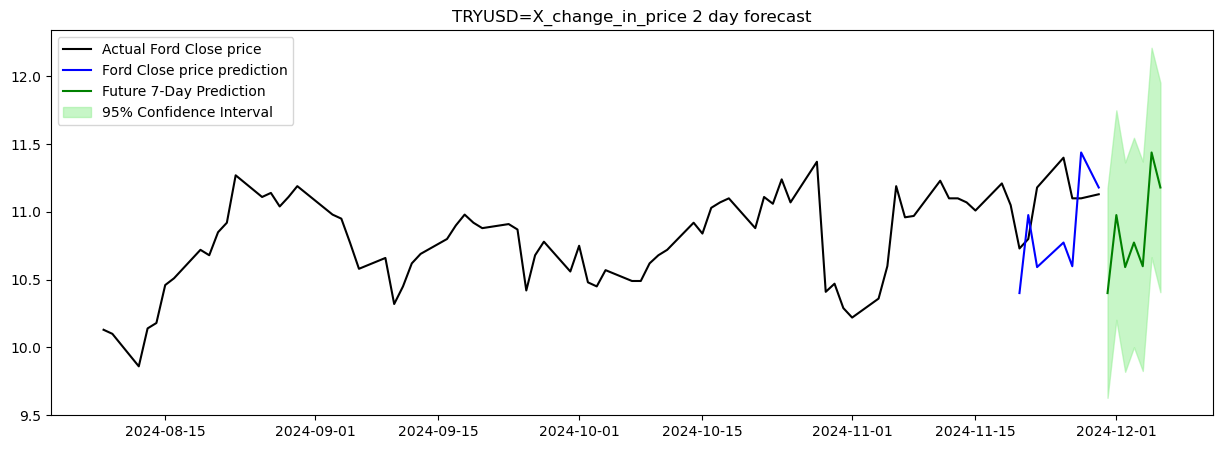

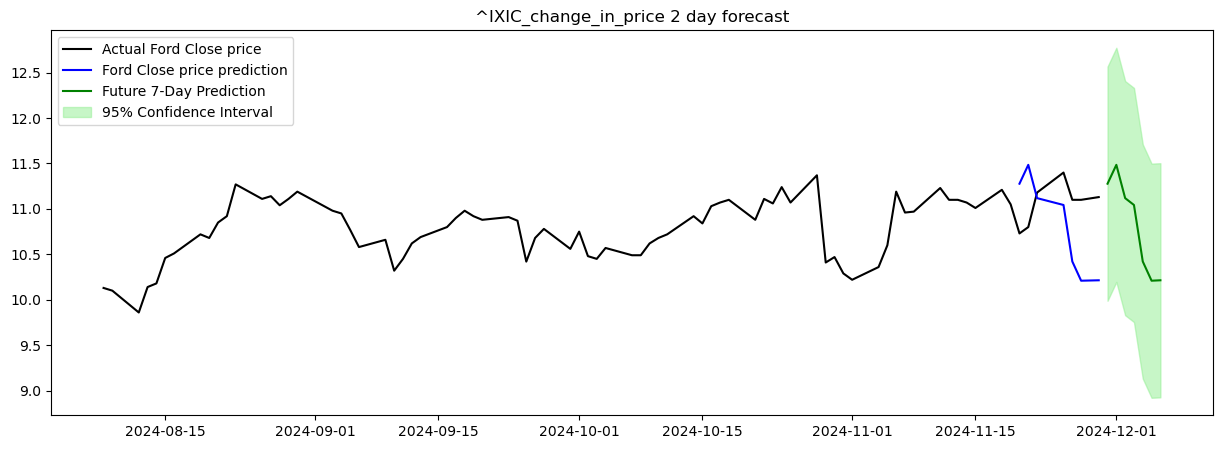

In [36]:
acc_forward_test_2, df_forward_test_2 = forward_validation(s_test, e_test, forecast_length=2)

for i in range(len(change_in_price_cols) - 1):
    pred = pd.DataFrame(Ford.loc[last_index]['Close'] + df_forward_test_2[change_in_price_cols[i]].cumsum(), index=df_forward_test_2.index)
    # Calculate confidence interval
    std_dev = (pred[change_in_price_cols[i]] - Ford.loc[last_index+1:]['Close']).std()
    upper_bound = pred[change_in_price_cols[i]] + (1.96*std_dev)
    lower_bound = pred[change_in_price_cols[i]] - (1.96*std_dev)
    # Plot
    plt.figure(figsize=(15,5))
    plt.plot(Ford['Date'], Ford['Close'], label='Actual Ford Close price', color='k')
    plt.plot(Ford.loc[last_index + 1:]['Date'], pred[change_in_price_cols[i]], label='Ford Close price prediction', color='b')
    future_dates = pd.date_range(Ford['Date'].iloc[-1] + pd.Timedelta(days=1), periods=7)
    plt.plot(future_dates, pred, label="Future 7-Day Prediction", color='green')
    plt.fill_between(future_dates, lower_bound, upper_bound, color='lightgreen', alpha=0.5, label="95% Confidence Interval")
    plt.title(change_in_price_cols[i] + ' 2 day forecast')
    plt.legend()
    plt.show()

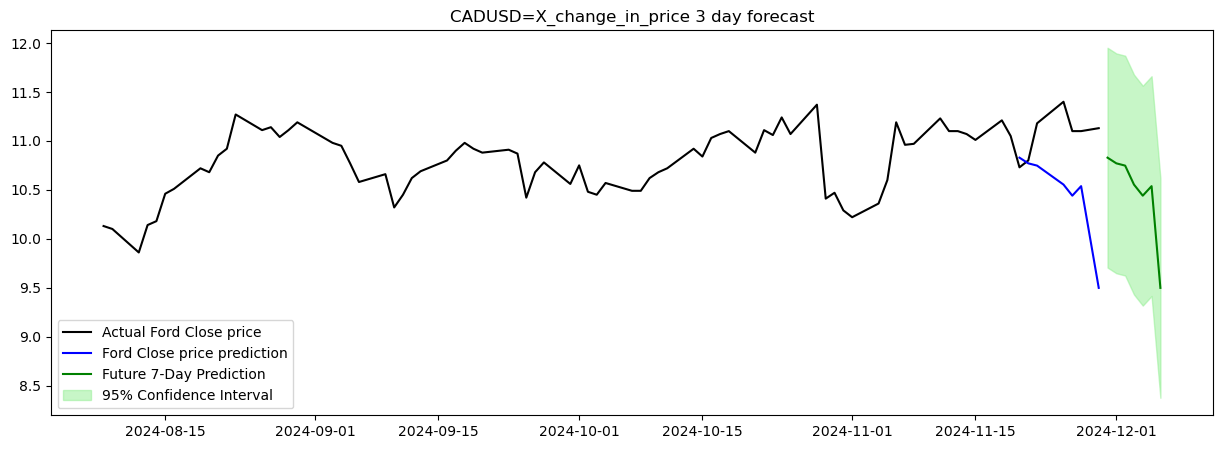

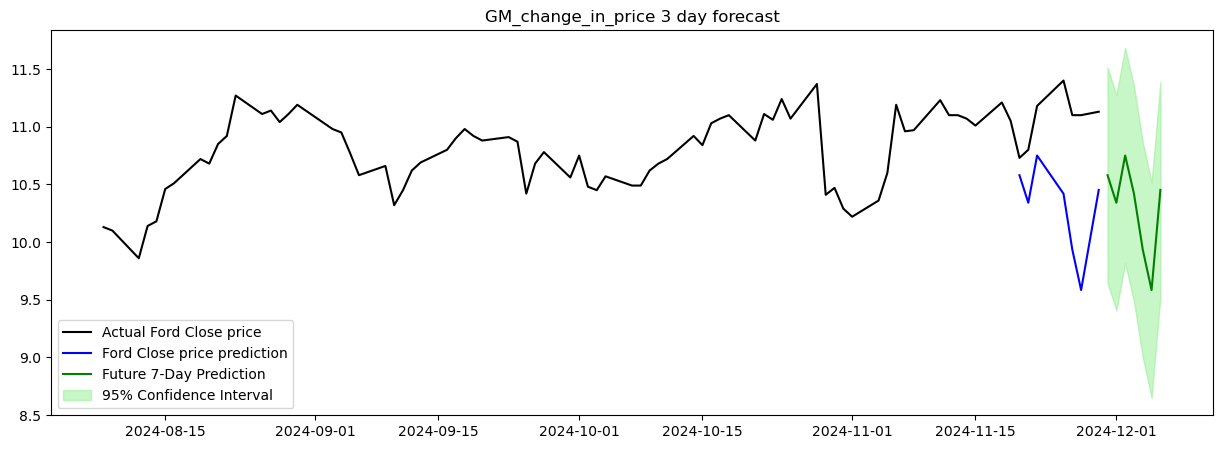

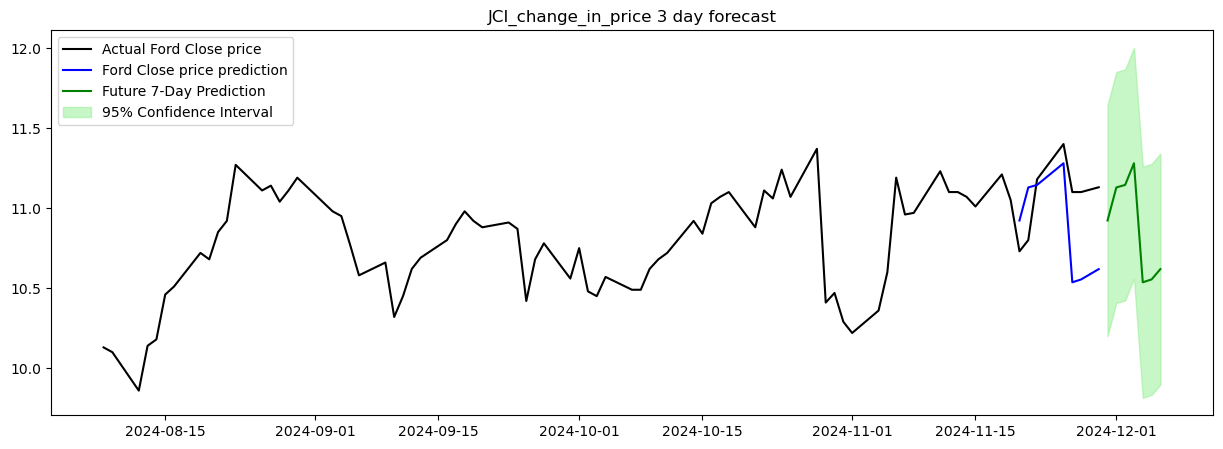

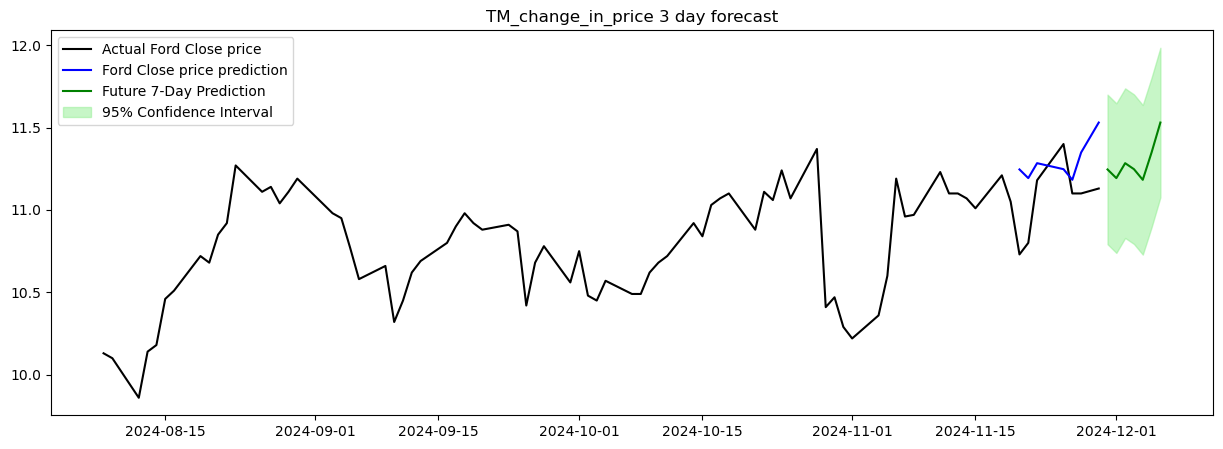

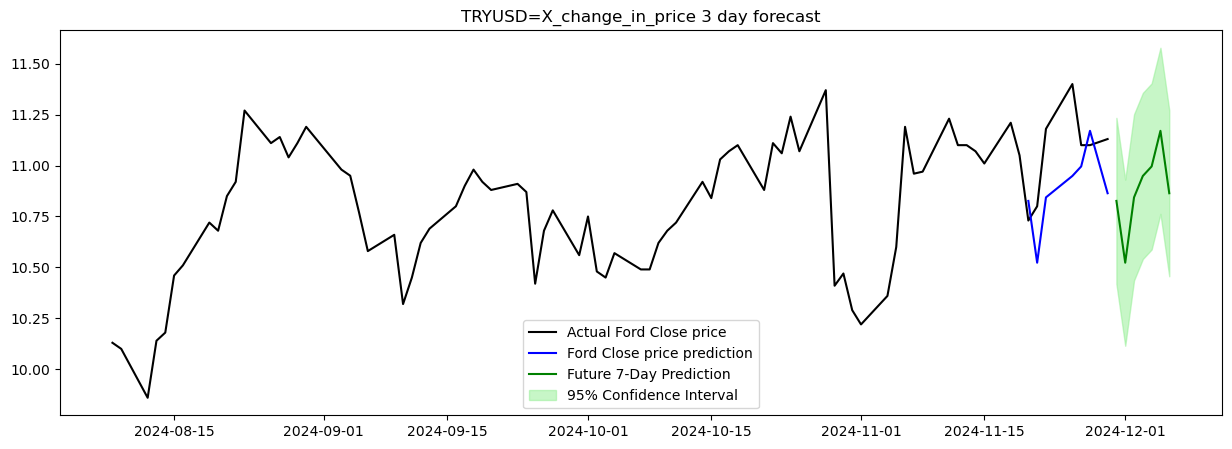

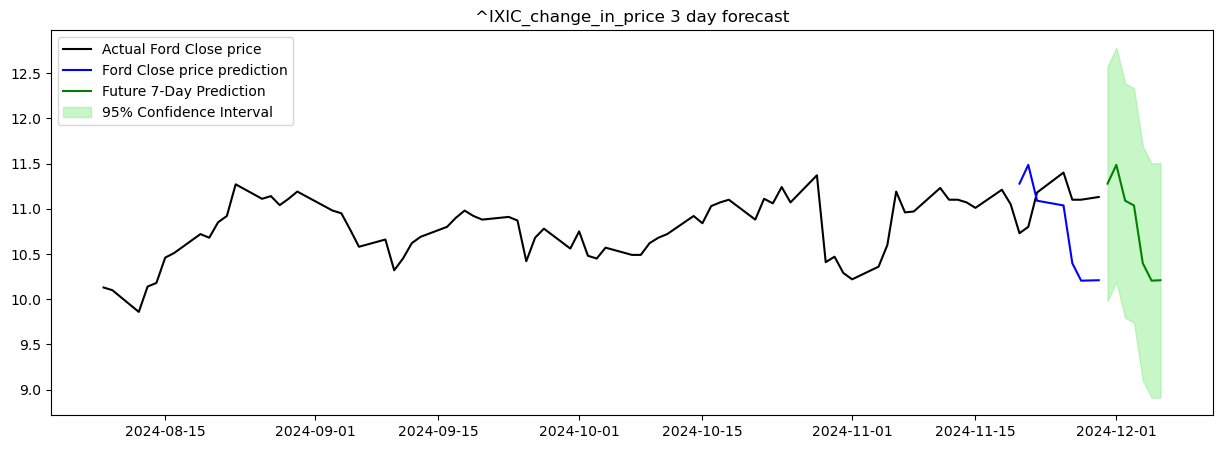

In [37]:
acc_forward_test_3, df_forward_test_3 = forward_validation(s_test, e_test, forecast_length=3)

for i in range(len(change_in_price_cols) - 1):
    pred = pd.DataFrame(Ford.loc[last_index]['Close'] + df_forward_test_3[change_in_price_cols[i]].cumsum(), index=df_forward_test_3.index)
    # Calculate confidence interval
    std_dev = (pred[change_in_price_cols[i]] - Ford.loc[last_index+1:]['Close']).std()
    upper_bound = pred[change_in_price_cols[i]] + (1.96*std_dev)
    lower_bound = pred[change_in_price_cols[i]] - (1.96*std_dev)
    # Plot
    plt.figure(figsize=(15,5))
    plt.plot(Ford['Date'], Ford['Close'], label='Actual Ford Close price', color='k')
    plt.plot(Ford.loc[last_index + 1:]['Date'], pred[change_in_price_cols[i]], label='Ford Close price prediction', color='b')
    future_dates = pd.date_range(Ford['Date'].iloc[-1] + pd.Timedelta(days=1), periods=7)
    plt.plot(future_dates, pred, label="Future 7-Day Prediction", color='green')
    plt.fill_between(future_dates, lower_bound, upper_bound, color='lightgreen', alpha=0.5, label="95% Confidence Interval")
    plt.title(change_in_price_cols[i] + ' 3 day forecast')
    plt.legend()
    plt.show()

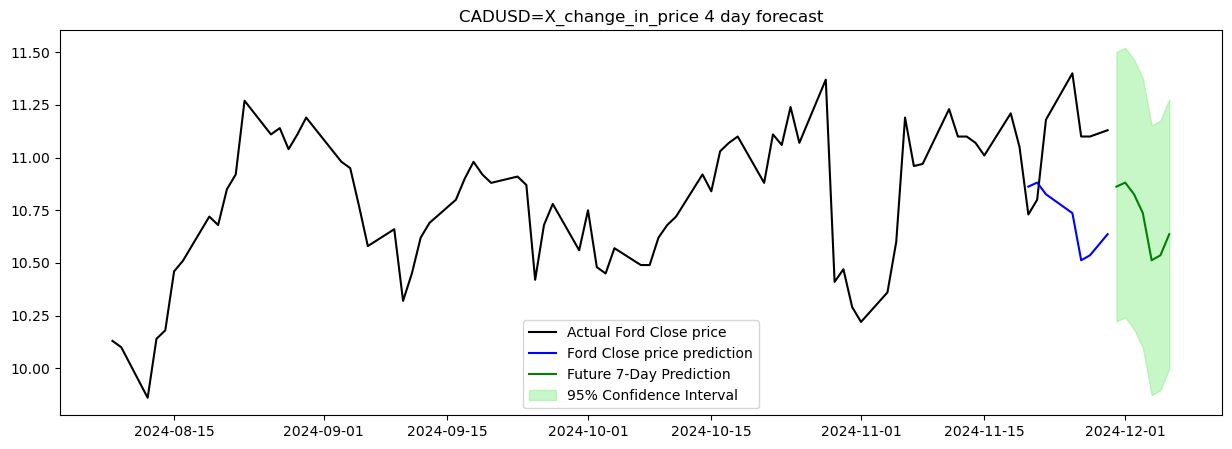

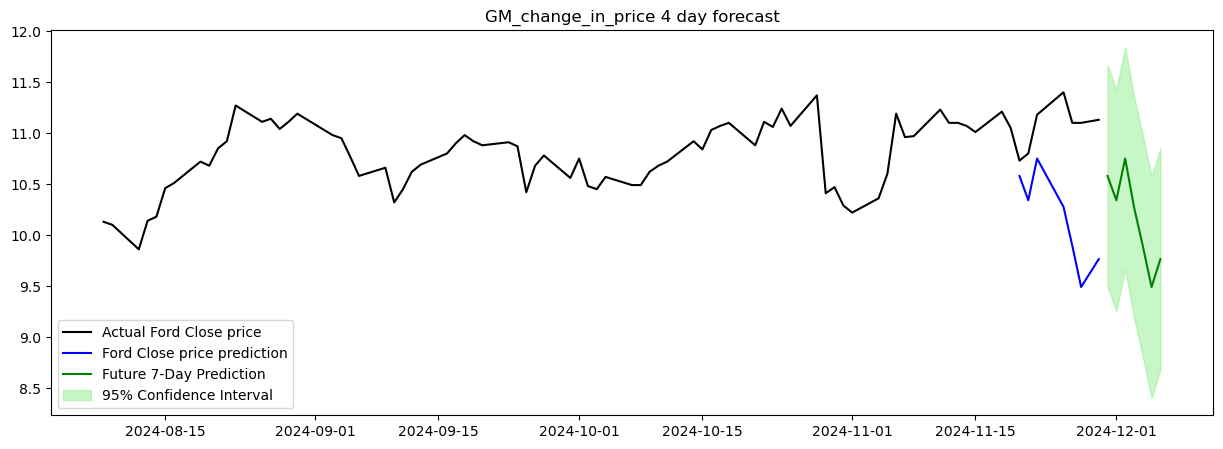

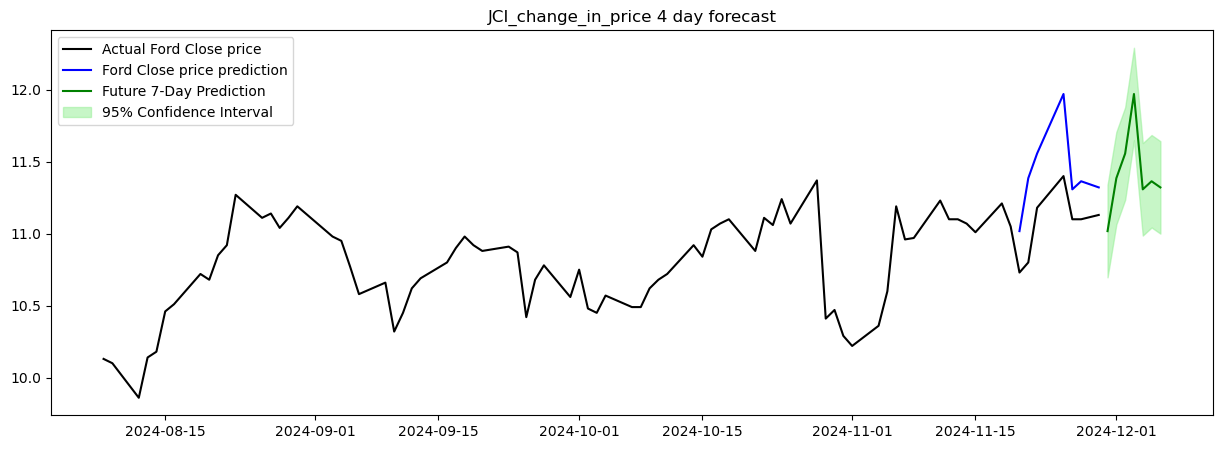

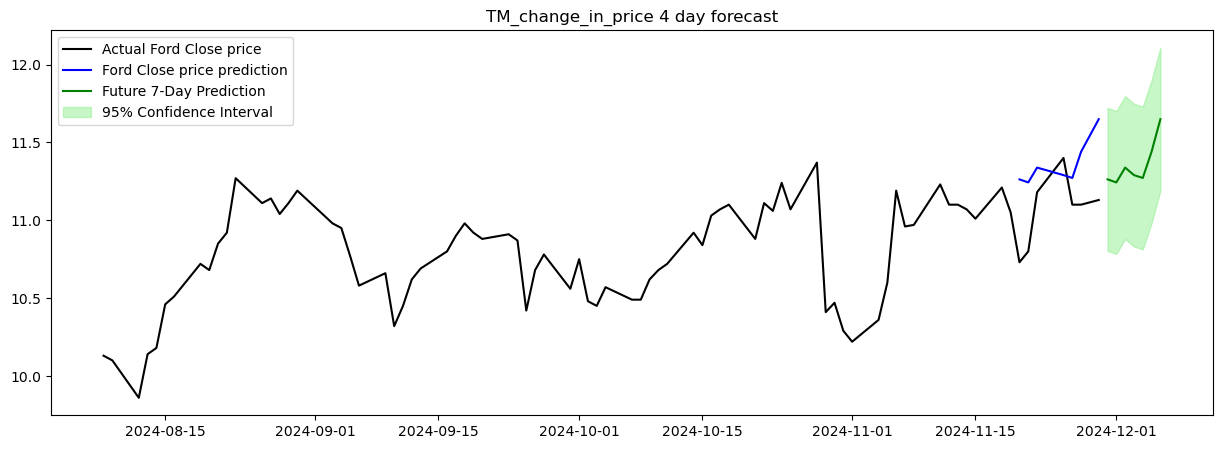

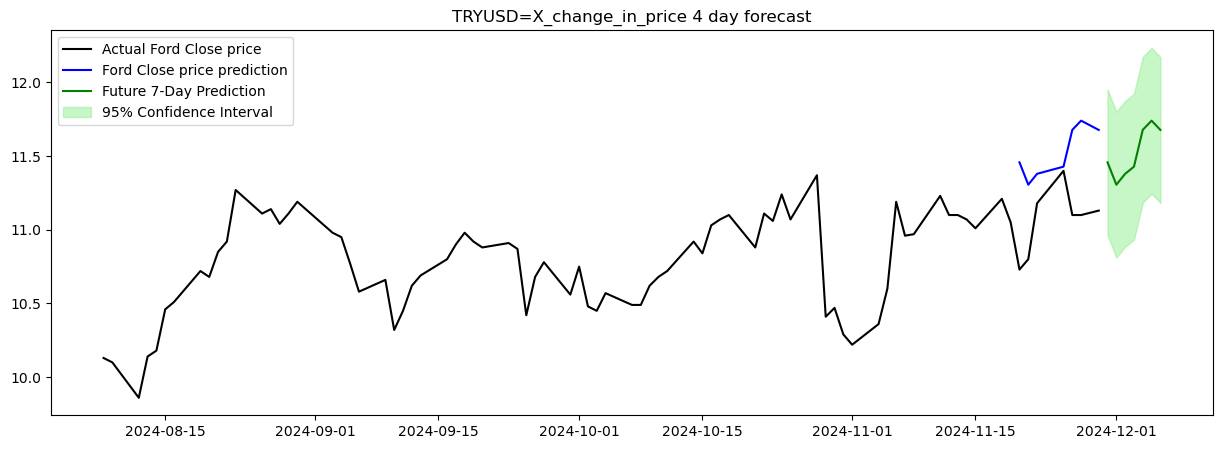

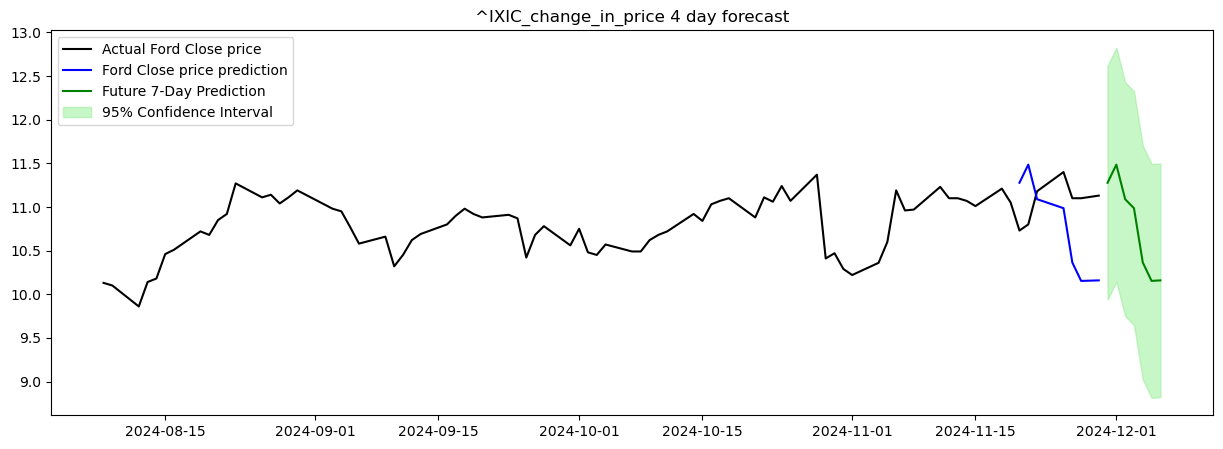

In [38]:
acc_forward_test_4, df_forward_test_4 = forward_validation(s_test, e_test, forecast_length=4)

for i in range(len(change_in_price_cols) - 1):
    pred = pd.DataFrame(Ford.loc[last_index]['Close'] + df_forward_test_4[change_in_price_cols[i]].cumsum(), index=df_forward_test_4.index)
    # Calculate confidence interval
    std_dev = (pred[change_in_price_cols[i]] - Ford.loc[last_index+1:]['Close']).std()
    upper_bound = pred[change_in_price_cols[i]] + (1.96*std_dev)
    lower_bound = pred[change_in_price_cols[i]] - (1.96*std_dev)
    # Plot
    plt.figure(figsize=(15,5))
    plt.plot(Ford['Date'], Ford['Close'], label='Actual Ford Close price', color='k')
    plt.plot(Ford.loc[last_index + 1:]['Date'], pred[change_in_price_cols[i]], label='Ford Close price prediction', color='b')
    future_dates = pd.date_range(Ford['Date'].iloc[-1] + pd.Timedelta(days=1), periods=7)
    plt.plot(future_dates, pred, label="Future 7-Day Prediction", color='green')
    plt.fill_between(future_dates, lower_bound, upper_bound, color='lightgreen', alpha=0.5, label="95% Confidence Interval")
    plt.title(change_in_price_cols[i] + ' 4 day forecast')
    plt.legend()
    plt.show()

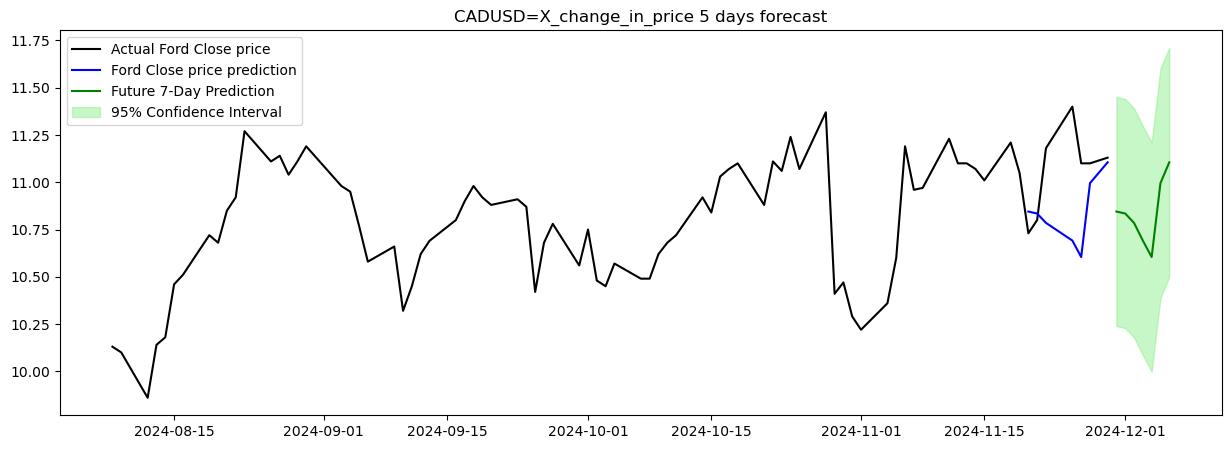

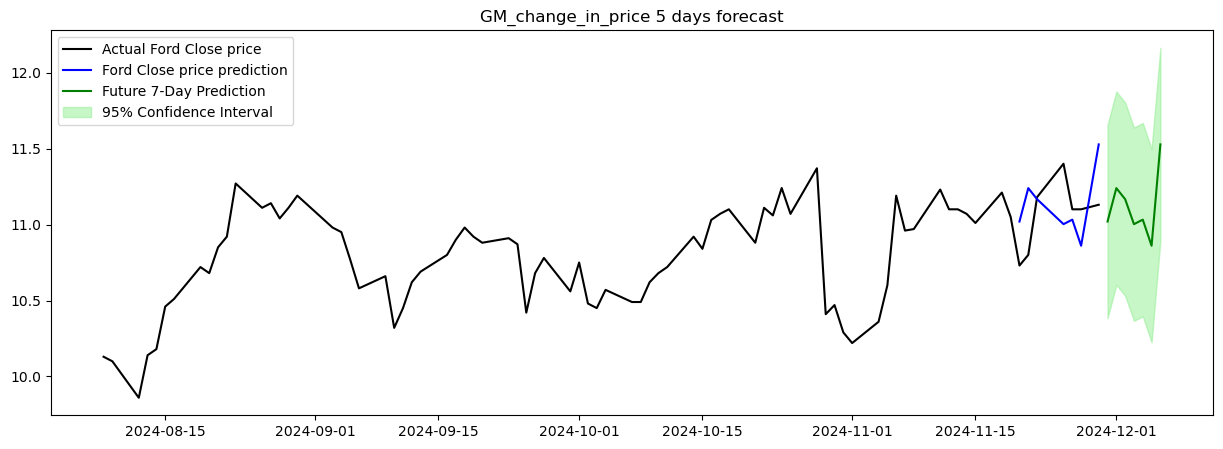

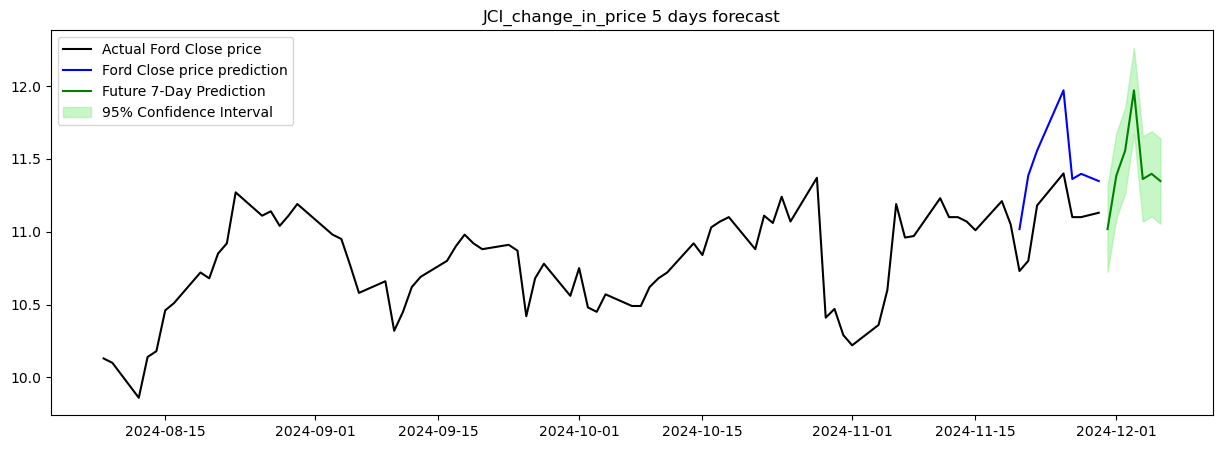

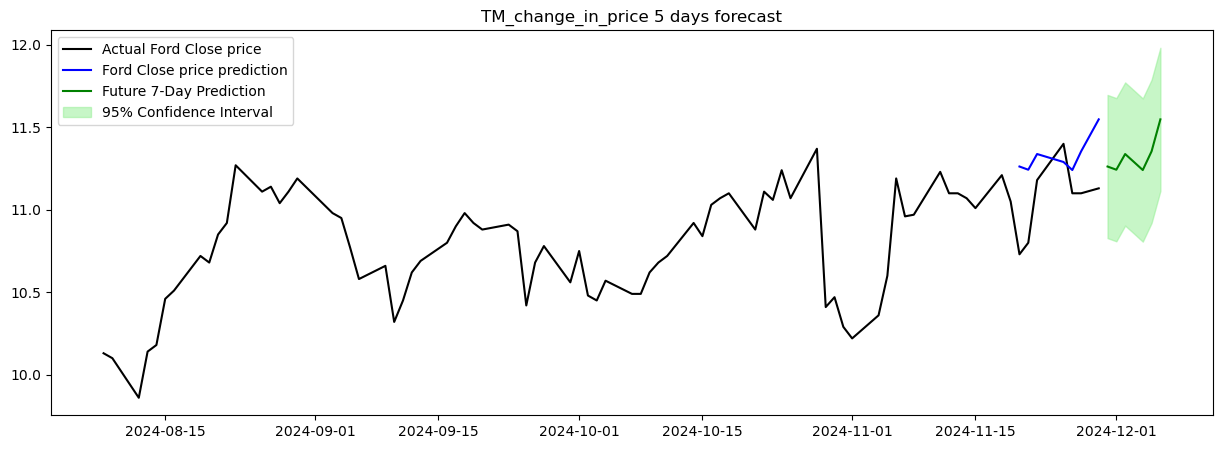

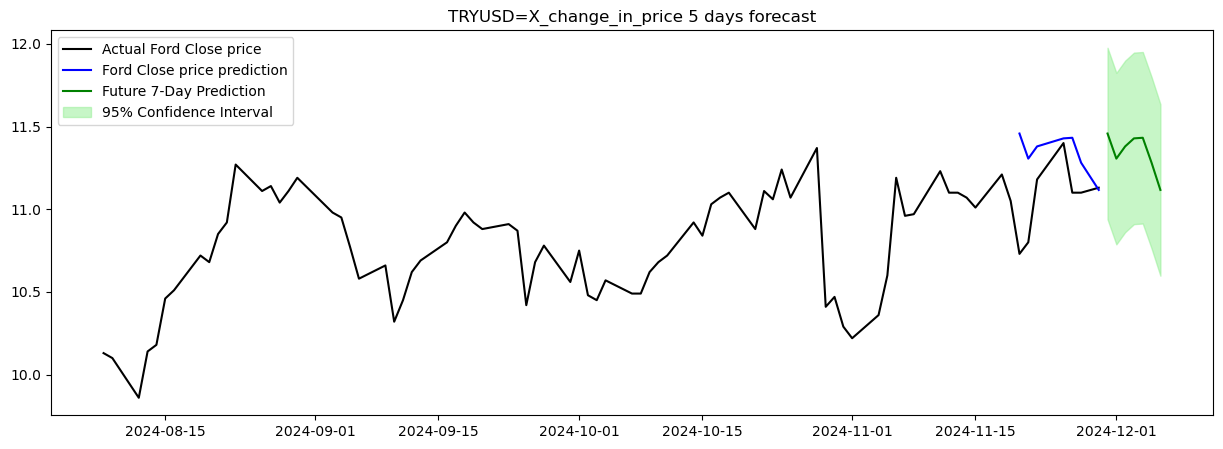

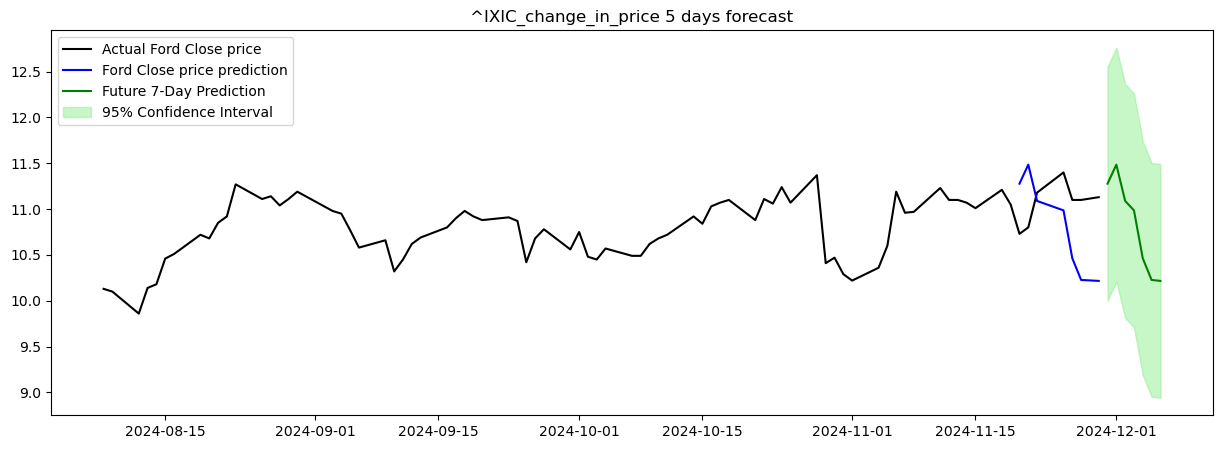

In [39]:
acc_forward_test_5, df_forward_test_5 = forward_validation(s_test, e_test, forecast_length=5)

for i in range(len(change_in_price_cols) - 1):
    pred = pd.DataFrame(Ford.loc[last_index]['Close'] + df_forward_test_5[change_in_price_cols[i]].cumsum(), index=df_forward_test_5.index)
    # Calculate confidence interval
    std_dev = (pred[change_in_price_cols[i]] - Ford.loc[last_index+1:]['Close']).std()
    upper_bound = pred[change_in_price_cols[i]] + (1.96*std_dev)
    lower_bound = pred[change_in_price_cols[i]] - (1.96*std_dev)
    # Plot
    plt.figure(figsize=(15,5))
    plt.plot(Ford['Date'], Ford['Close'], label='Actual Ford Close price', color='k')
    plt.plot(Ford.loc[last_index + 1:]['Date'], pred[change_in_price_cols[i]], label='Ford Close price prediction', color='b')
    future_dates = pd.date_range(Ford['Date'].iloc[-1] + pd.Timedelta(days=1), periods=7)
    plt.plot(future_dates, pred, label="Future 7-Day Prediction", color='green')
    plt.fill_between(future_dates, lower_bound, upper_bound, color='lightgreen', alpha=0.5, label="95% Confidence Interval")
    plt.title(change_in_price_cols[i] + ' 5 days forecast')
    plt.legend()
    plt.show()

## Generate a figure for the report

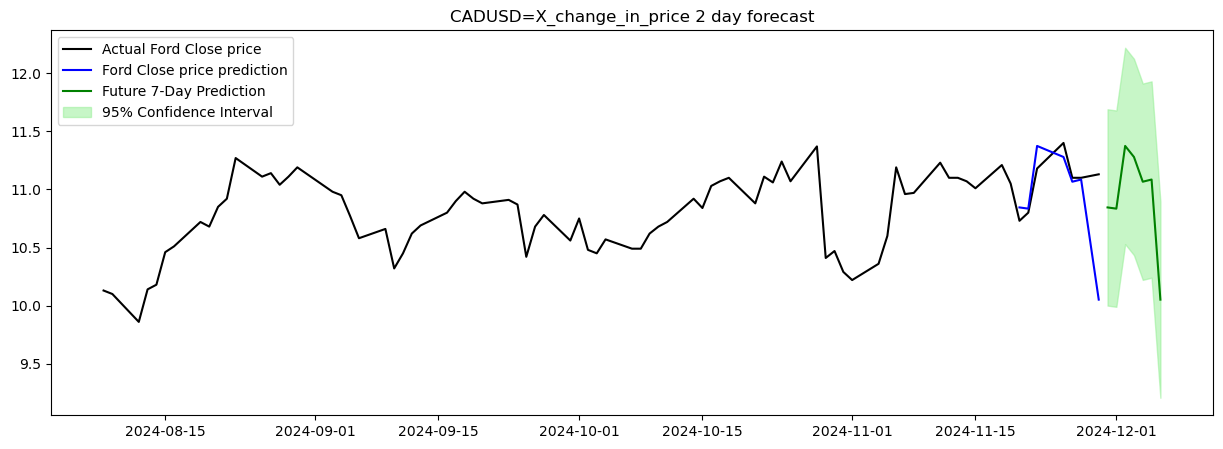

In [ ]:
for i in range(1):
    pred = pd.DataFrame(Ford.loc[last_index]['Close'] + df_forward_test_2[change_in_price_cols[i]].cumsum(), index=df_forward_test_2.index)
    # Calculate confidence interval
    std_dev = (pred[change_in_price_cols[i]] - Ford.loc[last_index+1:]['Close']).std()
    upper_bound = pred[change_in_price_cols[i]] + (1.96*std_dev)
    lower_bound = pred[change_in_price_cols[i]] - (1.96*std_dev)
    # Plot
    plt.figure(figsize=(15,5))
    plt.plot(Ford['Date'], Ford['Close'], label='Actual Ford Close price', color='k')
    plt.plot(Ford.loc[last_index + 1:]['Date'], pred[change_in_price_cols[i]], label='Ford Close price prediction', color='b')
    future_dates = pd.date_range(Ford['Date'].iloc[-1] + pd.Timedelta(days=1), periods=7)
    plt.plot(future_dates, pred, label="Future 7-Day Prediction", color='green')
    plt.fill_between(future_dates, lower_bound, upper_bound, color='lightgreen', alpha=0.5, label="95% Confidence Interval")
    plt.title(change_in_price_cols[i] + ' 2 day forecast')
    plt.legend()
    plt.show()
    #plt.savefig('VAR_close_price')